# Taller 3 : Vecinos más cercanos (KNN)

**Nombres:** 

*   Diryon Yonith Mora Romero.
*   Laura Valentina Gonzalez Rodriguez.

Usamos el método de vecinos más cercanos para clasificación. Por un lado, analizamos el Iris Dataset sobre especies de flores. Por el otro lado analizamos la supervivencia en la tragedia del Titanic utilizando diferentes valores de K. 

Importamos primero las librerías y paquetes que utilizaremos. Puede importar otros si lo considera útil.

In [110]:
#importar paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Iris Dataset

Importamos el conjunto de datos desde sklearn.




In [111]:
#importar dataset
from sklearn.datasets import load_iris

In [112]:
#Importar iris dataset y separar en data y target
iris = load_iris()
X=pd.DataFrame(iris.data)
y=pd.DataFrame(iris.target)

Primero separamos el conjunto de datos en Train y Test, en una proporción de 70%, 30%.

In [113]:
#Separar en train y test
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3)

Importamos el classificador KNeighborsClassifier de SKLearn con el nombre *knn*. Usar k=3.


In [114]:
#TODO1 importar KNeighborsClassifier con k=3 con el nombre knn
knn = KNeighborsClassifier(n_neighbors=3)

Entrenamos el clasificador con los datos de entrenamiento.

In [115]:
#TODO2 entrenar knn con los datos de entrenamiento

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
knn.fit(X_train, y_train)

# Arroja un error de DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
#knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Calculamos la exactitud del modelo en los datos Test, con el método *score* del clasificador.

In [116]:
#TODO3 calcular la exactitud (score) del modelo en los datos test.

print("Score = ", knn.score(X_test, y_test))

Score =  0.9777777777777777


**TODO 4**: Observe los diagramas de dispersión del Iris datset [aquí](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris).¿Cree que la exactitud mejorará con un k más pequeño?¿Cree que mejorará con un K más grande? ¿Por qué?

Observando los diagramas de dispersión del Iris dataset, se puede apreciar que las tres clases de flores se mezclan entre sí, especialmente la clase "versicolor" y "virginica". Debido a esta superposición de clases, es posible que un valor de k más pequeño permita al algoritmo capturar mejor las diferencias entre las clases y, por lo tanto, aumentar la exactitud del modelo.

Por otro lado, un valor de k más grande permitiría una mayor suavización de los límites de decisión del modelo, lo que podría reducir el efecto del ruido y las irregularidades en los datos. Sin embargo, un valor de k demasiado grande también podría resultar en un modelo que es demasiado simple y no puede capturar adecuadamente las relaciones entre las variables predictoras y la variable objetivo. En general, la elección de k depende de la complejidad del problema y la cantidad de ruido presente en los datos.


## Titanic Dataset
Ahora analizamos la supervivencia en el naufragio del Titanic. El conjunto de datos, así como el diccionario de atributos, puede verlos [aquí](https://www.kaggle.com/competitions/titanic/data).

*Observación* Usaremos sólo el conjunto Train proporcionado en Kaggle para la fase Test y Train en el taller.

In [117]:
#importar los datos de entrenamiento del Titanic Dataset.
df=pd.read_csv("train.csv")

Eliminar del dataframe las filas con valores ausentes (NaN).

In [118]:
#TODO5 Remover filas con valores ausentes.

df = df.dropna()

Explorar el dataset mediante su visualización, el uso de los métodos *head*, *info* y *value_counts* para los Dataframes en pandas y sus columnas. ¿Qué tipo de variables tiene? qué caracteriza a los valores de dichas variables? ¿Qué tipos de datos se usan?

In [119]:
#TODO6 Explorar el dataset
df.head()
df.info()

print("\n",df['Survived'].value_counts(),"\n")
print(df['Pclass'].value_counts(),"\n")
print(df['Sex'].value_counts(),"\n")
print(df['Age'].value_counts(),"\n")
print(df['Embarked'].value_counts(),"\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB

 1    123
0     60
Name: Survived, dtype: int64 

1    158
2     15
3     10
Name: Pclass, dtype: int64 

male      95
female    88
Name: Sex, dtype: int64 

36.0    11
24.0     9
19.0     6
35.0     6
31.0     5
        ..
71.0     1
3.0     

El método head() muestra las primeras 5 filas del dataframe, lo que permite tener una idea de la estructura general del conjunto de datos. El método info() proporciona información general del dataframe, como la cantidad de filas, columnas, nombre de las columnas y tipo de datos de cada columna. Los métodos value_counts() cuentan la cantidad de valores únicos en una columna específica.

En cuanto a los tipos de variables, se pueden identificar dos tipos: variables categóricas y variables numéricas. Las variables categóricas son aquellas que describen características que no se pueden medir de forma continua, como el sexo, la clase del billete y el puerto de embarque. Por otro lado, las variables numéricas son aquellas que describen características que se pueden medir de forma continua, como la edad, la tarifa del billete y el número de hermanos/cónyuges a bordo.

Los valores de las variables categóricas se caracterizan por ser discretos y limitados a un conjunto finito de opciones, mientras que los valores de las variables numéricas son continuos y pueden tomar cualquier valor dentro de un rango específico. Los tipos de datos que se usan son principalmente enteros y flotantes para las variables numéricas, y cadenas de texto para las variables categóricas.

**TODO7**: ¿Cuáles considera, de acuero a su intuición que son las variables más relevantes para predecir la columna 'Survived'? ¿Cuáles considera irrelevantes?¿Por qué?

Según mi intuición, las variables más relevantes para predecir la columna "Survived" serían las siguientes:

    Sexo: Se sabe que durante el naufragio del Titanic, se dio prioridad a las mujeres y los niños para el acceso a los botes salvavidas. Por lo tanto, es probable que el sexo de un pasajero tenga una fuerte relación con su supervivencia.

    Clase del billete: Se sabe que las personas en las clases más altas tenían más probabilidades de sobrevivir, ya que tenían acceso a mejores alojamientos y a los botes salvavidas de manera prioritaria. Por lo tanto, es probable que la clase del billete tenga una relación con la supervivencia.

    Edad: Los niños y los ancianos también tuvieron prioridad para acceder a los botes salvavidas. Por lo tanto, la edad de un pasajero puede tener una relación con su supervivencia.
    
    ibSp: Esta variable indica la cantidad de hermanos/cónyuges a bordo del Titanic. Como mencionamos anteriormente, la posibilidad de sobrevivir puede estar relacionada con tener a un familiar cercano a bordo, por lo que esta variable podría ser relevante para predecir la supervivencia.

    Fare: El precio del billete también puede estar relacionado con la clase del billete y, por lo tanto, con la probabilidad de supervivencia. Las personas con billetes más caros tenían más probabilidades de sobrevivir, como ya mencionamos.

    Parch: Esta variable indica la cantidad de padres/hijos a bordo del Titanic. Similar a la variable SibSp, puede haber una relación entre tener familiares cercanos a bordo y la probabilidad de sobrevivir.

    Embarked: Esta variable indica el puerto de embarque del pasajero. Si bien esto puede no estar directamente relacionado con la supervivencia, puede estar relacionado con otros factores que influyen en la supervivencia, como la clase del billete o la nacionalidad del pasajero.

Por otro lado, considero que las siguientes variables pueden ser menos relevantes para predecir la columna "Survived":

    Número de billete: Esta variable es principalmente identificadora y no aporta información significativa sobre la supervivencia de un pasajero.

    Nombre: Similar a la variable número de billete, esta variable es principalmente identificadora y no aporta información significativa sobre la supervivencia de un pasajero.

    Cabina: Esta variable puede ser relevante si se tiene información sobre la ubicación de las cabinas en el barco y su relación con la probabilidad de supervivencia. Sin embargo, en ausencia de esa información, la variable puede ser menos relevante.

En resumen, considero que las variables más relevantes para predecir la supervivencia de un pasajero en el naufragio del Titanic son el sexo, la clase del billete y la edad, mientras que las variables menos relevantes son el número de billete, el nombre y la cabina.

In [120]:
#Separar la columna objetivo.
X=df.drop('Survived',axis=1)
y=df['Survived']

In [121]:
#TODO8 Remover columnas que usted considera irrelevantes.
X=X.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

Convertimos a dummies las columnas categóricas. Nos aseguramos de que las originales no permanezcan en la tabla. Se sugiere usar el parámetro drop_first = True si está trabajando con Getdummies. ¿Por qué cree que es conveniente usar este parámetro?

El parámetro drop_first=True en el método get_dummies se utiliza para eliminar una de las categorías de una variable categórica, que actúa como la categoría de referencia o base, para evitar la multicolinealidad.

Cuando se crean variables dummies para variables categóricas con n categorías, se crean n-1 variables dummies. La categoría de referencia o base se utiliza como punto de referencia para comparar las otras categorías. Por lo tanto, una categoría no necesita tener su propia variable dummy.

Por ejemplo, en el caso de la variable "Embarked", existen tres posibles valores: "C", "Q" y "S". Si creamos variables dummy para estas tres categorías, se crearán dos variables dummy ("Embarked_Q" y "Embarked_S"). El valor de "Embarked_C" se puede inferir por la falta de valores en las otras dos variables dummy. Por lo tanto, podemos eliminar una de las variables dummy para evitar la multicolinealidad y reducir el número de características.

En resumen, el parámetro drop_first=True se utiliza para crear una representación única de las categorías de una variable categórica y evitar la multicolinealidad en el conjunto de datos, lo que puede mejorar la precisión del modelo de aprendizaje automático.

In [122]:
#TODO9 Convertir a dummies. Asegurarse de eliminar las columnas originales. Se sugiere usar el parámetro drop_first=True si se está trabajando con getdummies.
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [123]:
#Imprimir info de X
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      183 non-null    int64  
 1   Age         183 non-null    float64
 2   SibSp       183 non-null    int64  
 3   Parch       183 non-null    int64  
 4   Fare        183 non-null    float64
 5   Sex_male    183 non-null    uint8  
 6   Embarked_Q  183 non-null    uint8  
 7   Embarked_S  183 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 9.1 KB


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,0,0,0
3,1,35.0,1,0,53.1000,0,0,1
6,1,54.0,0,0,51.8625,1,0,1
10,3,4.0,1,1,16.7000,0,0,1
11,1,58.0,0,0,26.5500,0,0,1


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2, shuffle=True)

Ahora entrenamos clasificadores de KNN con diferentes valores de k y visualizamos el cambio entre ellos.

In [125]:
#TODO10 para k entre 1 y 100, entrenar knn en los datos de entrenamiento. Calcular sus respectivos scores
# Guardar los scores en una lista llamada "scores".
scores = []
kss = []

for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    kss.append(k)
    
print(kss)
print(scores)
print(max(scores), " , ", scores.index(max(scores)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[0.6216216216216216, 0.5405405405405406, 0.6486486486486487, 0.5945945945945946, 0.7567567567567568, 0.7027027027027027, 0.8108108108108109, 0.7297297297297297, 0.8108108108108109, 0.8108108108108109, 0.8378378378378378, 0.7567567567567568, 0.8378378378378378, 0.8108108108108109, 0.8378378378378378, 0.8108108108108109, 0.8378378378378378, 0.8378378378378378, 0.8378378378378378, 0.7567567567567568, 0.8108108108108109, 0.8108108108108109, 0.7837837837837838, 0.7567567567567568, 0.7837837837837838, 0.7837837837837838, 0.7837837837837838, 0.7837837837837838, 0.8108108108108109, 0.8108108108108109, 0.8108

Text(0, 0.5, 'Accuracy')

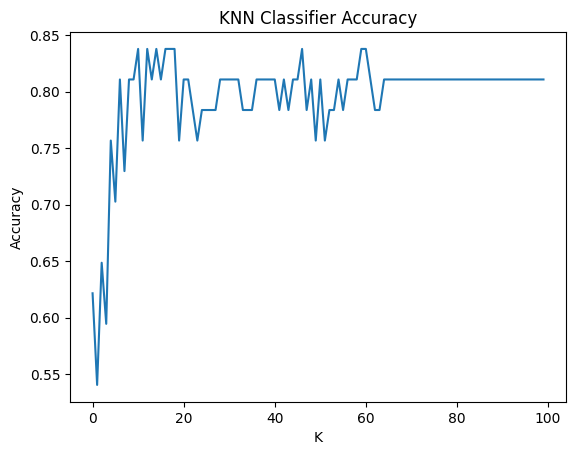

In [126]:
#Graficar scores
plt.plot(scores)
plt.title('KNN Classifier Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')

**TODO11** ¿Qué se puede concluir a partir de la gráfica anterior?

**TODO12:** Determinar si las siguientes afirmaciones son verdaderas o falsas. Justificar su respuesta.

- El score en el test set de 1-NN siempre será menor o igual que el de 5-NN.  

- El tiempo para clasificar una muestra del testset con k-NN crece con el tamaño del train set. 

A partir de la gráfica de la precisión del clasificador KNN en función del valor de k, se puede concluir que:

    Para valores bajos de k (por ejemplo, k < 10), la precisión del clasificador es generalmente alta. Esto se debe a que el clasificador es muy flexible y se adapta bien a los datos de entrenamiento. Sin embargo, también puede ser propenso al sobreajuste y tener dificultades para generalizar a nuevos datos.
    Para valores altos de k (por ejemplo, k > 50), la precisión del clasificador tiende a disminuir gradualmente. Esto se debe a que el clasificador se vuelve menos flexible y menos capaz de adaptarse a los datos de entrenamiento. Como resultado, puede ser más capaz de generalizar a nuevos datos, pero también puede perder información importante y hacer predicciones menos precisas.
    El valor óptimo de k puede variar según los datos y el problema en cuestión. En este caso, parece que el valor óptimo de k está alrededor de k = 20-30, ya que es ahí donde se alcanza la mayor precisión en la gráfica.

En general, la gráfica sugiere que el clasificador KNN puede ser un buen modelo para predecir la supervivencia en el naufragio del Titanic, siempre y cuando se seleccione el valor óptimo de k.

    El score en el test set de 1-NN siempre será menor o igual que el de 5-NN.

Esta afirmación es falsa. El clasificador KNN con k = 1 es conocido como el clasificador 1-NN, y es el más flexible de todos los clasificadores KNN, ya que se ajusta muy bien a los datos de entrenamiento. Por otro lado, el clasificador KNN con k = 5 es más rígido, y por lo tanto, tiende a generalizar mejor a nuevos datos. En consecuencia, es posible que el score en el conjunto de prueba para 1-NN sea menor o igual que el score para 5-NN, pero también es posible que sea mayor. Todo depende de los datos y el problema en cuestión.

    El tiempo para clasificar una muestra del testset con k-NN crece con el tamaño del train set.

Esta afirmación es verdadera. El algoritmo KNN implica la comparación de cada muestra en el conjunto de prueba con todas las muestras en el conjunto de entrenamiento. Por lo tanto, cuanto mayor sea el tamaño del conjunto de entrenamiento, más tiempo tardará el algoritmo en clasificar cada muestra en el conjunto de prueba. En consecuencia, el tiempo para clasificar una muestra del conjunto de prueba con KNN aumenta a medida que el tamaño del conjunto de entrenamiento aumenta.

## Titanic dataset usando pesos en la distancia.

A continuación usamos clasificadores de KNN dándole pesos a las distancias. 

**TODO13:** ¿Nota alguna diferencia con la clasificación sin pesos en las distancias? ¿Alguna hipótesis sobre el porqué?

In [127]:
# Weighted k-nn
scores=[]
for n in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
  knn.fit(X_train,y_train)
  s=knn.score(X_test,y_test)
  scores.append(s)
  print(s)

0.6216216216216216
0.5945945945945946
0.6486486486486487
0.6756756756756757
0.7297297297297297
0.7027027027027027
0.7027027027027027
0.7297297297297297
0.7297297297297297
0.7567567567567568
0.7567567567567568
0.7837837837837838
0.7567567567567568
0.7837837837837838
0.8108108108108109
0.7837837837837838
0.8108108108108109
0.8108108108108109
0.7837837837837838
0.8108108108108109
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7567567567567568
0.7837837837837838
0.7837837837837838
0.8108108108108109
0.8108108108108109
0.8108108108108109
0.8108108108108109
0.8108108108108109
0.8108108108108109
0.8108108108108109
0.8108108108108109
0.8108108108108109
0.8108108108108109
0.8108108108108109
0.8108108108108109
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.8108108108108109
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837

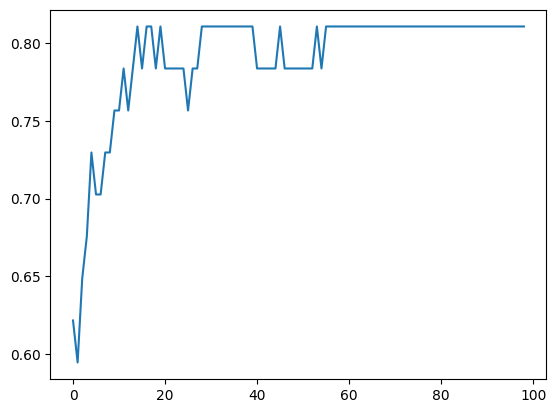

In [128]:
#Graficar
plt.plot(scores)

Sí, hay una diferencia en la clasificación con pesos en las distancias en comparación con la clasificación sin pesos en las distancias. Cuando se utilizan pesos en las distancias, el algoritmo KNN da más importancia a las muestras cercanas al punto de prueba. En otras palabras, las muestras más cercanas al punto de prueba tienen un mayor peso en la clasificación que las muestras más alejadas. Esto puede dar lugar a una mejora en la precisión de la clasificación en algunos casos.

La razón por la que la clasificación con pesos en las distancias puede ser más precisa que la clasificación sin pesos en las distancias es que algunos puntos de datos cercanos al punto de prueba pueden ser más importantes que otros puntos de datos más alejados. Con la clasificación sin pesos en las distancias, todos los puntos de datos tienen la misma influencia en la clasificación, lo que puede ser subóptimo en algunos casos.

El código proporcionado ajusta un clasificador KNN para diferentes valores de k utilizando pesos en las distancias y almacena los puntajes de precisión en una lista llamada "scores". Luego, grafica la lista de puntajes de precisión en función de k.